# ch 3. coefficient t-test 

지난 챕터에서는 r square 값에 대해서 알아보았습니다. 그리고 마지막에 r square만으로 회귀식의 적절성을 판단하는 것은 부족하고, 다른 기법들과 함께 사용되어야 한다고 정리했습니다. 

이번 챕터에서는 회귀식을 통해 도출한 회귀 계수가 통계적으로 유의한지 검정하는 기법에 대해서 알아보겠습니다.

## 모델 준비

In [6]:
from utils import load_house_dataset
import statsmodels.api as sm

x_train, x_test, y_train, y_test = load_house_dataset()
x_train = x_train["sqft_living"]
x_test = x_test["sqft_living"]

x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [7]:
x_train, x_test, y_train, y_test = load_house_dataset()
x_train = x_train["sqft_living"]
x_test = x_test["sqft_living"]

x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [8]:
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [9]:
results.params

const         -41421.994412
sqft_living      279.926905
dtype: float64

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.659e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:15:16   Log-Likelihood:            -2.3990e+05
No. Observations:               17280   AIC:                         4.798e+05
Df Residuals:                   17278   BIC:                         4.798e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.142e+04   4920.466     -8.418      0.000   -5.11e+04   -3.18e+04
sqft_living   279.9269      2.173    128.793      0.000     275.667     284.187
==============================================================================
Omnibus:                    11627.704   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395396.345
Skew:                           2.766   Prob(JB):                         0.00
Kurtosis:                      25.772   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 회귀 계수 유의성 검정

두번째 표에 나와있는 t-value와 p-value를 이해해보겠습니다. 먼저 맨 앞의 coefficient는 최소 제곱법을 통해 계산된 회귀 계수들입니다. 각각의 회귀 계수에 대해서 t-value를 구하고, p-value를 계산해 유의성 검정을 한 결과입니다.

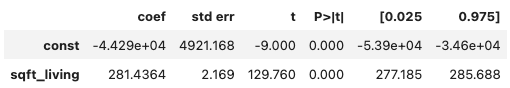

그런데 회귀 계수의 유의성을 검정한다는 것이 무슨 말일까요?

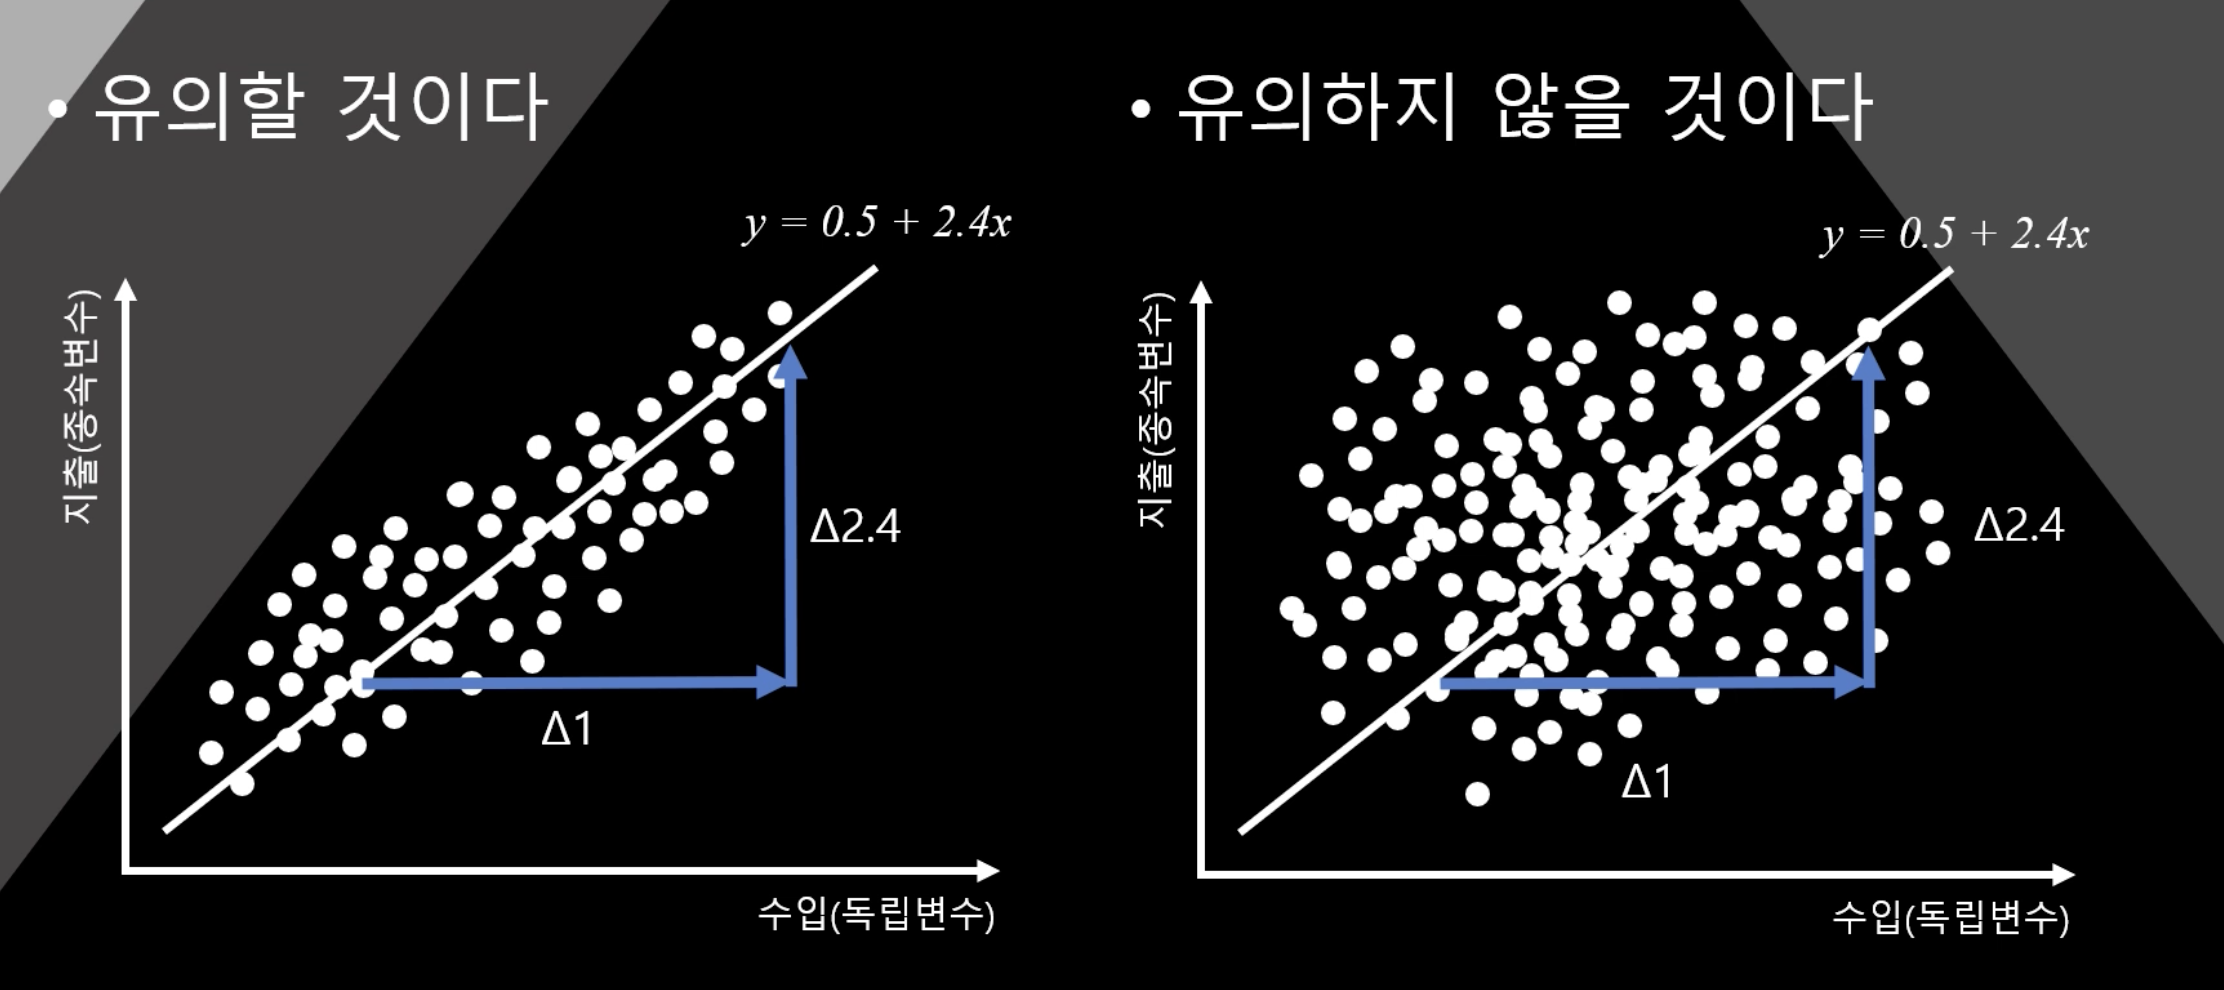

두 데이터 셋에 대해서 y=0.5 + 2.4x라는 동일한 회귀식이 도출되었습니다. 회귀식에 의하면 독립변수가 한 단위 증가할 때, 종속 변수가 2.4만큼 증가한다고 예측할 수 있습니다.

그런데 첫번째 데이터 셋에서는 독립 변수가 한단위 증가했을 때, 종속 변수가 2.4만큼 증가하는 것이 우연에 의해 발생했을 가능성이 적습니다. 반면에 두 번째 데이터 셋에서는 종속 변수가 2.4만큼 증가했다면 이는 우연히 발생했을 가능성이 높습니다.

즉, 두 데이터 셋에서 같은 회귀 계수가 나왔다 하더라고, 각각의 유의성을 검정해봐야 합니다. 첫번째 데이터 셋에서 도출된 회귀 계수 2.4는 아마도 유의하고, 두번째 데이터 셋의 회귀 계수 2.4는 아마도 유의하지 않을 것입니다. 이를 t-test로 검정한 것이 위에 보이는 표입니다.

## 표준 오차

그렇다면 어떻게 t-test를 적용해서 회귀 계수의 유의성을 검정할 수 있을까요? 이를 이해하기 위해선 MSE와 MSR, 그리고 표준 오차를 이해해야 합니다.

### SSE

SSE: 회귀식으로 설명할 수 없는 데이터 변동량

$$SSE=\sum_{i=1}^{n}(y_i-{\hat{y}}_i)^2$$

### SSR

SSR: 회귀식으로 설명할 수 있는 데이터 변동량

$$SSR=\sum_{i=1}^{n}{({\hat{y}}_i-\bar{y})}^2$$

### MSE

MSE는 Mean Square due to Error의 약자로 SSE 값을 SSE의 자유도(n-2)로 나눠준 값입니다. 이는 오차항의 분산에 대한 추정값이 됩니다.

$$n:\text{데이터 샘플 개수}$$

$$MSE=\frac{SSE}{n-2}=\frac{\sum_{i=1}^{n}(y_i-{\hat{y}}_i)^2}{n-2}$$

### MSR

다음으로 MSR은 Mean Squared due to Regression의 약자로 SSR 값에 SSR의 자유도(회귀 계수 개수)를 나눠준 값입니다. 회귀 모델이 종속 변수의 변동성을 얼마나 설명하는지에 대한 추정값입니다.

$$k:\text{회귀 계수 개수}$$

$$MSR=\frac{SSR}{k}=\frac{\sum_{i=1}^{n}{({\hat{y}}_i-\bar{y})}^2}{k}$$

### 표준 오차
MSE는 오차항의 분산에 대한 추정값이라고 했습니다. 여기에 제곱근을 취해주면 오차항의 표준 편차에 대한 추정값이 됩니다.

$$S=\sqrt{MSE}$$

표준 오차는 이 오차항의 표준 편차 추정값을 독립 변수의 변동성으로 나눠준 값입니다.

$$S_{b_{1}}=\frac{S}{\sqrt{\sum(x_{i}-\bar{x})^2}}$$

표준 오차와 t-value는 표에 std err로 출력되어 있습니다.

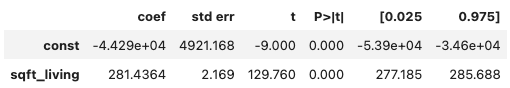

## t-test를 이용한 회귀 계수 유의성 검정

### 가설 설정

$$Y=\beta_{0}+\beta_{1}X+\epsilon$$

단순 회귀식에서 직선의 기울기에 해당하는 β1의 유의성을 검정해보겠습니다. 먼저 가설을 세워보겠습니다. 귀무가설은 독립 변수와 종속 변수 사이에는 아무런 관계가 없다, 대립 가설은 관계가 있다가 됩니다. 식으로 표현하면 아래와 같습니다.

$$H_0:\beta_{1}=0$$
$$H_1:\beta_{1}\neq0$$

### 검정 통계량

검정 통계량 t-value는 회귀 계수를 표준 오차로 나눈 값이며, 이는 자유도가 n-2인 t 분포를 따릅니다. 이를 직관적으로 이해해보면, 회귀 계수가 표준 오차 보다 유의미하게 크다면, 회귀 계수에 의해서 발생하는 종속 변수의 변화가 우연히 발생가능한 오차보다 유의미하게 크다면 회귀 계수가 유의하다고 검정할 수 있게 됩니다.

$$S=\sqrt{MSE}$$

$$S_{b_{1}}=\frac{S}{\sqrt{\sum(x_{i}-\bar{x})^2}}$$

$$t=\frac{b_{1}}{S_{b_{1}}} \sim t_{n-2}$$


summary 표에 나와있는 회귀 계수와 표준 오차 값으로 t-value 값을 한번 계산해보겠습니다.

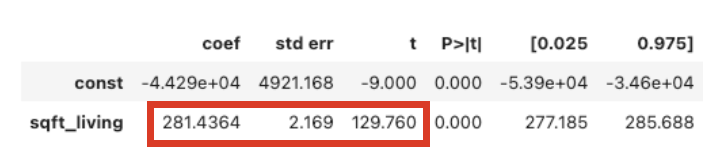

In [11]:
std_err = 2.169
coeff = 281.4364
t_value = coeff / std_err
print(t_value)

129.75398801290916


### p-value 계산 및 통계적 의사 결정

t-value와 t 분포표를 가지고 이제 p-value를 계산할 수 있습니다. 이 값이 유의 수준 0.05보다 작다면 해당 회귀 계수가 유의하다고 검정할 수 있습니다. 예제에서는 p-value가 거의 0에 근접하여 유의하다고 결론 내릴 수 있습니다.  

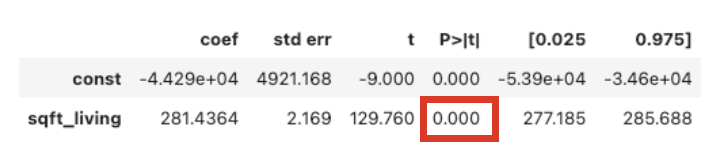

검정 결과 sqft_living의 회귀 계수는 유의하였습니다. 특수한 상황을 제외하고 절편에 해당하는 𝛽0에 대해서는 유의성 검정을 진행하지 않습니다.

## 정리

이번 챕터에서는 회귀 계수의 유의성을 검정한 다는 것이 무슨 의미인지 알아보았습니다. 또한 표준 오차의 개념에 대해서 짚어보았고, 이를 t-test에 적용하여 회귀 계수들의 유의성을 검정하는 방법에 대해서 알아보았습니다. 다음 챕터에서는 f-test를 이용해서 전체 회귀 계수들이 얼마나 유의한지를 검정하는 방법에 대해서 알아보겠습니다.